# Plot spindle current versus temperature

We want to visualize the relationship between the current and the temperature of the spindle. In order to do that, we want to take averages by given time slots. 

In [1]:
import os
import sys
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

current_folder = os.getcwd()
print(current_folder)

/Users/opatiny/git/opatiny/predictiveMaintenance/src/notebooks


## Load data

   

In [2]:
from utils.getFormattedSignalData import getFormattedSignalData

folderPath = "../../data/Mecatis/Warmup_Mecatis_05_02_25/"

temperature = "lrSigSpindleTemp.csv"
current = "stSigAxCurrentS.csv"

tempPath = current_folder + "/" + folderPath + temperature
currentPath = current_folder + "/" + folderPath + current

temperatureData = getFormattedSignalData(tempPath)
currentData = getFormattedSignalData(currentPath)


## Plot the data

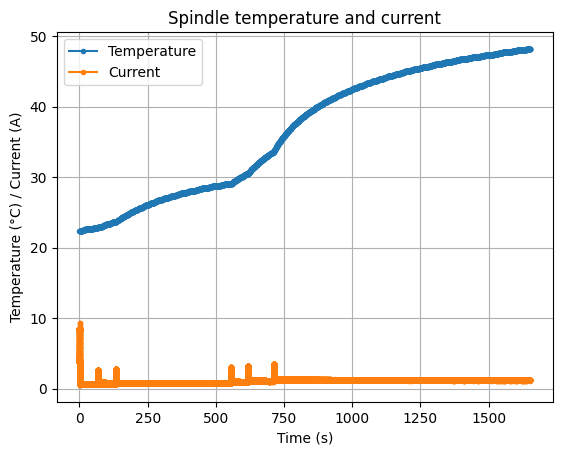

In [3]:
plt.plot(
    temperatureData.loc[:, "timeSeconds"], temperatureData.loc[:, "value"], "o-", markersize=3)
plt.plot(
    currentData.loc[:, "timeSeconds"], currentData.loc[:, "value"], "o-", markersize=3)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C) / Current (A)")
plt.legend(["Temperature", "Current"])
plt.title("Spindle temperature and current")
plt.grid()
plt.show()

## Compute average values for slots

For the two signals, we want to define a time interval, and compute the average for each successive intervals.

In [ ]:
import pandas as pd

def computeSlotsAverage(signal: pd.DataFrame) -> pd.DataFrame:
    """
    Compute the average of the signal in each slot.
    """
    signal["slot"] = signal["timeSeconds"] // 10
    return signal.groupby("slot").mean()


# test the function with basic data
data = pd.DataFrame({"timeSeconds": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     "value": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

      timeSeconds  value
slot                    
0             5.0    5.0
1            10.0   10.0


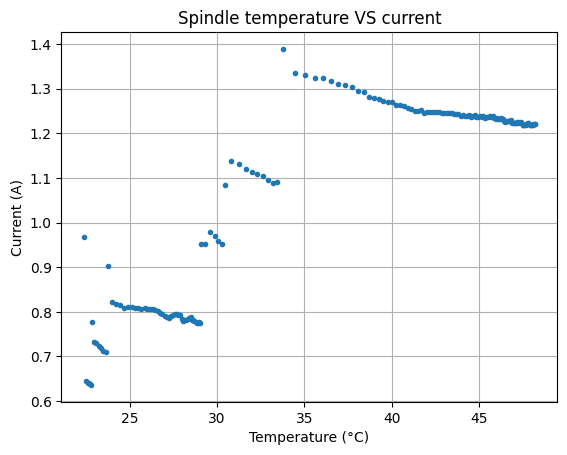

In [5]:
# apply the function to the temperature and current data
temperatureSlots = computeSlotsAverage(temperatureData)
currentSlots = computeSlotsAverage(currentData)

plt.plot(
    temperatureSlots.loc[:, "value"], currentSlots.loc[:, "value"], "o", markersize=3)
plt.xlabel("Temperature (°C)")
plt.ylabel("Current (A)")
plt.title("Spindle temperature VS current")
plt.grid()
plt.show()